In [115]:
%pylab inline

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [286]:
class KNN:
    def __init__(self, k):
        self.k = k
    def fit(self, learn_data, learn_labels):
        self.learn_data = learn_data
        self.learn_labels = learn_labels

    def predict(self, test_data):
        self.test_data = test_data
        distances = sqrt(sum((self.learn_data[:, newaxis] - self.test_data)**2, -1).T)
        k_nearest = argsort(distances, 1)[:, 0:self.k]
        k_nearest_labels = self.learn_labels[k_nearest]
        self.predictions = stats.mode(k_nearest_labels,1)[0].reshape(-1)
        return self.predictions

    def plot_pred(self, p = 50):
        self.plot_real(self.predictions)
        
    def plot_real(self, test_labels, p=50):
        plot_predictions(self.learn_data, self.learn_labels, self.test_data, test_labels, p)
        
    def accuracy(self, test_labels):
        return accuracy(self.predictions, test_labels)

def plot_predictions(learn_data, learn_labels, test_data, test_labels, p=50):
        colors = array(['r', 'g', 'b', 'y', 's'])
        scatter(learn_data[:,0],learn_data[:,1], c=colors[learn_labels])
        scatter(test_data[:,0], test_data[:,1], c=colors[test_labels], s=p)
        show()
        
def accuracy(predictions, real_labels):
     return 'accuracy: ' + str(sum(real_labels == predictions)*100/len(predictions)) + '%'
    
def divide_data(data, labels):
    zipped = zip(data, labels)
    random.shuffle(zipped)
    inzipped = zip(*zipped)
    
    learn_size = 2*data.shape[0]/3
    learn_data = array(inzipped[0])[:learn_size]
    learn_labels = array(inzipped[1])[:learn_size]
    test_data = array(inzipped[0])[learn_size:]
    test_labels = array(inzipped[1])[learn_size:]
    return learn_data, learn_labels, test_data, test_labels


knn = KNN(5)
X1 = array([[i, i] for i in arange(5)])
knn.fit(X1, array([5,4,5,2,5]))
print knn.predict(X1)
print knn.accuracy(array([5,4,5,2,5]))

[5 5 5 5 5]
accuracy: 60%


In [281]:
# wczytanie zestawu danych z pliku
t_data = pd.read_csv("../titanic.csv")
t_data = t_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
t_data = t_data.dropna()
t_data['Sex'] = pd.Categorical.from_array(data['Sex']).codes
t_data['Embarked'] = pd.Categorical.from_array(data['Embarked']).codes

t_labels = t_data['Survived'].get_values()
t_data = t_data.drop('Survived', axis = 1).get_values()

t_learn_data, t_learn_labels, t_test_data, t_test_labels = divide_data(t_data, t_labels)

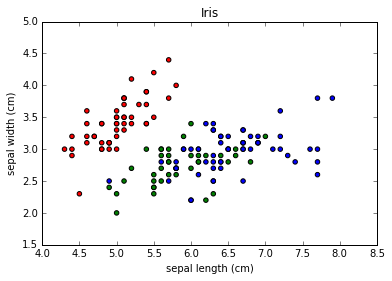

In [289]:
from sklearn import datasets 
iris = datasets.load_iris() 
p = scatter(iris.data[:,0], iris.data[:,1], c=array(['r', 'g', 'b', 'y', 's'])[iris.target])
xlabel('sepal length (cm)')
ylabel('sepal width (cm)')
title('Iris')

i_learn_data, i_learn_labels, i_test_data, i_test_labels = divide_data(iris.data, iris.target)

accuracy: 96%


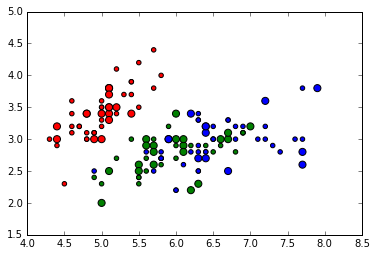

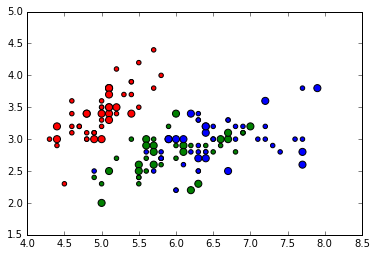

In [290]:

knn = KNN(5)
knn.fit(i_learn_data, i_learn_labels)
knn.predict(i_test_data)
print knn.accuracy(i_test_labels)
knn.plot_pred()
knn.plot_real(i_test_labels)

accuracy: 96%


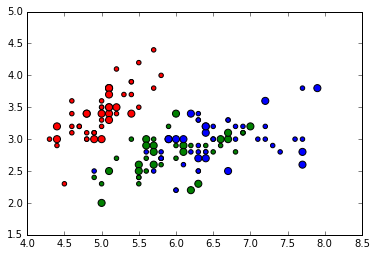

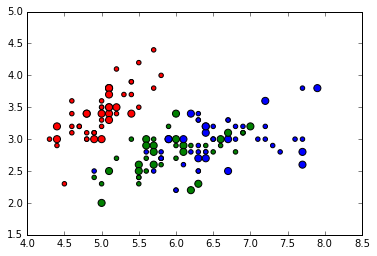

In [292]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rfc.fit(i_learn_data, i_learn_labels)
predictions = rfc.predict(i_test_data)
print accuracy(predictions, i_test_labels)

plot_predictions(i_learn_data, i_learn_labels, i_test_data, i_test_labels)
plot_predictions(i_learn_data, i_learn_labels, i_test_data, predictions)

accuracy: 98%


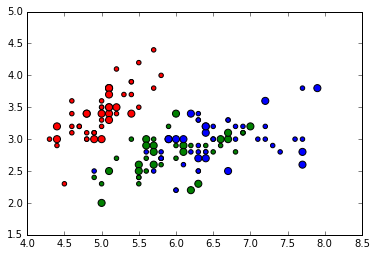

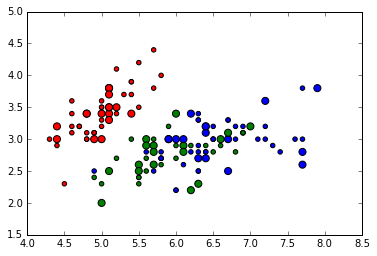

In [294]:
etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
etc.fit(i_learn_data, i_learn_labels)
predictions = etc.predict(i_test_data)
print accuracy(predictions, i_test_labels)

plot_predictions(i_learn_data, i_learn_labels, i_test_data, i_test_labels)
plot_predictions(i_learn_data, i_learn_labels, i_test_data, predictions)

In [335]:
print 'Titanic: '

etc = ExtraTreesClassifier(n_estimators=15, max_depth=None, min_samples_split=5, random_state=4)
etc.fit(t_learn_data, t_learn_labels)
predictions = etc.predict(t_test_data)
print 'ETC: ', accuracy(predictions, t_test_labels)

knn = KNN(3)
knn.fit(t_learn_data, t_learn_labels)
predictions = knn.predict(t_test_data)
print 'KNN: ', accuracy(predictions, t_test_labels)

rfc = RandomForestClassifier(n_estimators=15, max_depth=None, min_samples_split=5, random_state=8)
rfc.fit(t_learn_data, t_learn_labels)
predictions = rfc.predict(t_test_data)
print 'RFC: ', accuracy(predictions, t_test_labels)

Titanic: 
ETC:  accuracy: 76%
KNN:  accuracy: 69%
RFC:  accuracy: 80%


In [298]:
rfc.fit(t_learn_data, t_learn_labels)
predictions = etc.predict(t_test_data)
print accuracy(predictions, t_test_labels)

accuracy: 74%
